In [1]:
import numpy as np
import pandas as pd

In [3]:
# 读取鸢尾花数据集，header参数用来指定标题的行，默认为0，若没有标题，则使用None
# 第一行：id,花萼长度，花萼宽度，花瓣长度，花瓣宽度 cm, 鸢尾花的种类
data = pd.read_csv(r"iris.arff.csv", header = 0)
data
# 显示前n行记录，默认n=5
# data.head()
# 显示末尾的n行记录，默认为5
# data.tail()
# 随机抽取样本，默认为1
#data.sample(10)
data["class"] = data["class"].map({"Iris-virginica":0, "Iris-setosa":1, "Iris-versicolor":2})
# 删除不需要的列
# data.drop("class", axis=1)
# 查看是否有重复
# data.duplicated().any()
# len(data)
# 删除重复的数据集
data.drop_duplicates(inplace=True)
# len(data)
# 查看各个类别有多少记录
data["class"].value_counts()

class
2    50
0    49
1    48
Name: count, dtype: int64

In [14]:
class KNN:
    ''' 用KNN实现分类'''
    def __init__(self, k):
        '''
        初始化方法
        parameters
        ---------
        k: int 邻居的个数
        '''
        self.k = k

    def fit(self, X, y):
        """训练方法
        parameters
        --------
        X: 类数组类型, shape：[样本数量，特征数量]
        待训练的样本特征
        y: 类数组类型，shape：样本数量
        每个样本的目标值（标签）
        """
        # 将X转化为ndarray数组类型
        self.X = np.asarray(X)
        self.y = np.asarray(y)

    def predict(self, X):
        """根据参数传递的样本，对样本数据进行预测
        parameters
        --------
        X: 类数组类型, shape：[样本数量，特征数量]
        待训练的样本特征
        Returns
        -----------
        result: 数组类型
        预测的结果
        """
        X = np.asarray(X)
        result = []
        # 对X进行遍历，每次取一行
        for x in X:
            # 广播操作，先扩展x到X的行数，进行运算
            # 用每个元素对X中所有样本进行距离运算,按行求和运算
            # 对测试集中的每个样本，对训练集中所有样本的距离
            dis = np.sqrt(np.sum((x - self.X)**2, axis=1))
            # 对距离进行排序，排序后的值在原始数组（排序前）中的索引
            index = dis.argsort()
            # 进行截断，取k个元素（取k个最近元素的索引）
            index = index[:self.k]
            # 返回每个元素出现的次数（非负元素）
            count = np.bincount(self.y[index])
            # 返回ndarray数组中，值最大的元素对应的索引，索引就是判定的类别
            # 最大元素索引，即为出现次数最多的元素
            result.append(count.argmax())
        return np.asarray(result)

In [16]:
# 提取每个类别鸢尾花数据
t0 = data[data["class"] == 0]
t1 = data[data["class"] == 1]
t2 = data[data["class"] == 2]
# 洗牌，随机种子指定后，洗牌后随机性一定
t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
# 划分测试集和训练集
train_X = pd.concat([t0.iloc[:40, :-1],t1.iloc[:40, :-1],t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:40, -1],t1.iloc[:40, -1],t2.iloc[:40, -1]], axis=0)

test_X = pd.concat([t0.iloc[40:, :-1],t1.iloc[40:, :-1],t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1],t1.iloc[40:, -1],t2.iloc[40:, -1]], axis=0)

#进行训练与测试
knn = KNN(k=3)
# 训练
knn.fit(train_X, train_y)
#测试
result = knn.predict(test_X)
display(result==test_y)
display(test_y)

121     True
119    False
109     True
139     True
146     True
103     True
100     True
148     True
145     True
21      True
19      True
9       True
41      True
47      True
3       True
0       True
46      True
86      True
71      True
69      True
59      True
89      True
96      True
53      True
50      True
97      True
94      True
Name: class, dtype: bool

121    0
119    0
109    0
139    0
146    0
103    0
100    0
148    0
145    0
21     1
19     1
9      1
41     1
47     1
3      1
0      1
46     1
86     2
71     2
69     2
59     2
89     2
96     2
53     2
50     2
97     2
94     2
Name: class, dtype: int64

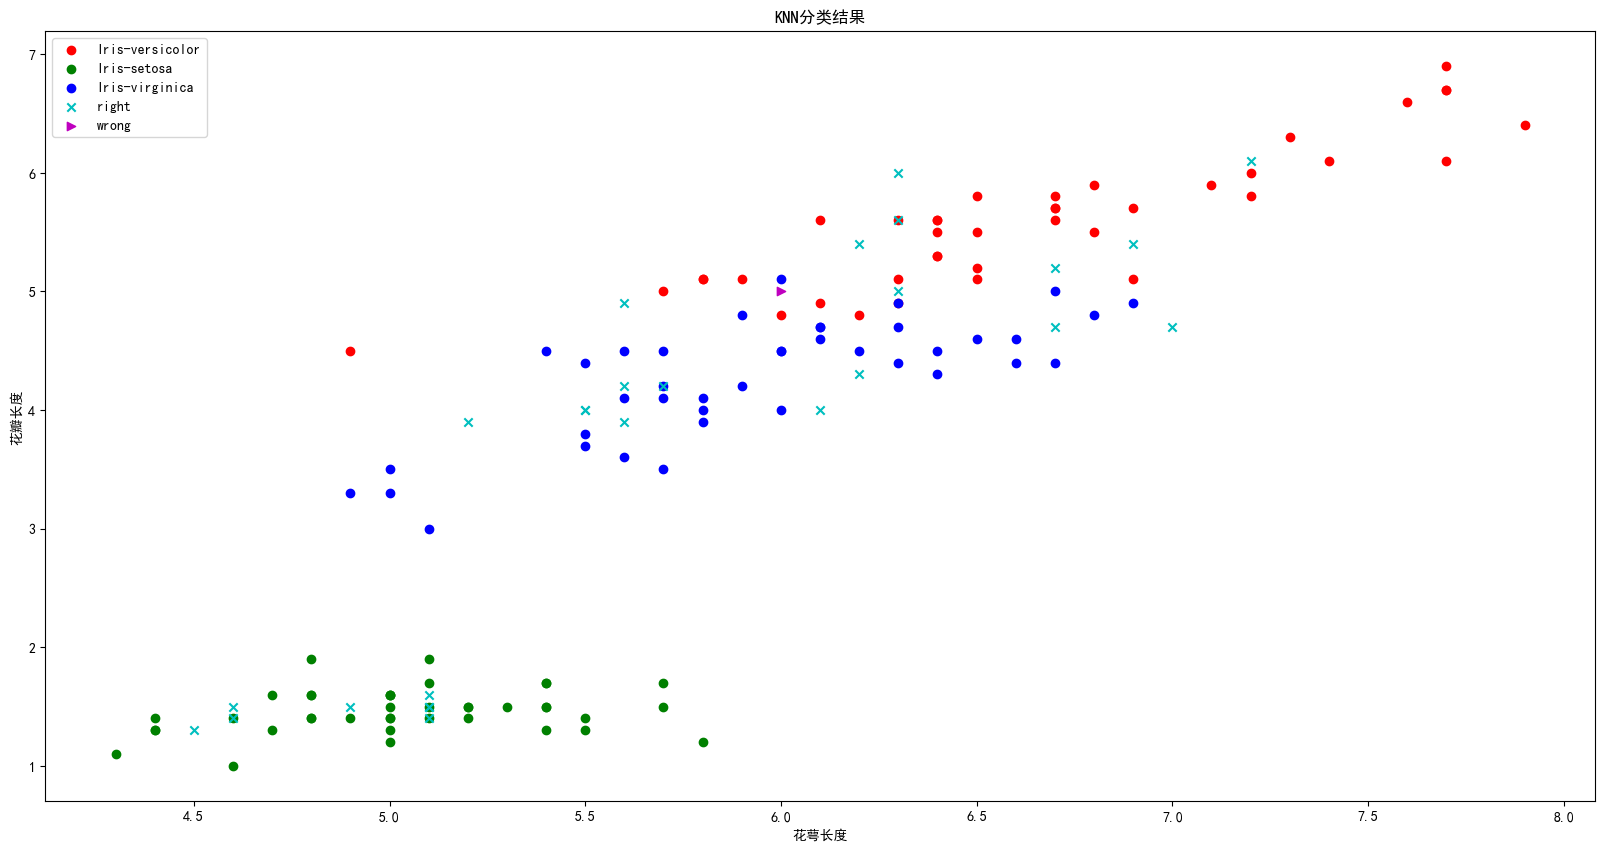

In [19]:
# "Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
mpl.rcParams["font.family"] = 'SimHei' # 默认mpl不支持中文，设置一下支持 
mpl.rcParams["axes.unicode_minus"] = False # 设置中文字体是可以正常显示负号
plt.scatter(x=t0["sepallength"][:40], y=t0["petallength"][:40], color='r', label="Iris-versicolor")
plt.scatter(x=t1["sepallength"][:40], y=t1["petallength"][:40], color='g', label="Iris-setosa")
plt.scatter(x=t2["sepallength"][:40], y=t2["petallength"][:40], color='b', label="Iris-virginica")
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["sepallength"], y=right["petallength"], color='c', label="right", marker="x")
plt.scatter(x=wrong["sepallength"], y=wrong["petallength"], color='m', label="wrong", marker=">")
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('KNN分类结果')
plt.legend(loc='best')
plt.show()